In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense,Embedding,Flatten,Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.utils import shuffle


In [0]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-05-11 12:54:22--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  17.1MB/s    in 12s     

2020-05-11 12:54:35 (15.4 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [0]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [0]:
!ls

ml-20m	ml-20m.zip  sample_data


In [0]:
df = pd.read_csv('ml-20m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [0]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [0]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values


In [0]:
#Get number of user and movies
N = len(set(user_ids))
M = len(set(movie_ids))

#set embedding dimension
K=10

In [0]:
#Neural network

u = Input(shape=(1,1))
m = Input(shape=(1,))

u_emb = Embedding(N,K)(u)
m_emb = Embedding(M,K)(m)

u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)

x = Concatenate()([u_emb,m_emb])#feature_vector

x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)




In [0]:
#build 
model = Model(inputs=[u,m],outputs=x)
model.compile(
    loss='mse',
    optimizer=SGD(lr=0.08, momentum=0.9)

)

In [0]:
#split the data

user_ids,movie_ids,ratings = shuffle(user_ids,movie_ids,ratings)
Ntrain = int(0.8 * len(ratings))
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

#center the ratings
avg_ratings = train_ratings.mean()
train_ratings = train_ratings - avg_ratings
test_ratings = test_ratings - avg_ratings

In [0]:
r = model.fit(
    x=[train_user, train_movie],
    y=train_ratings,
    epochs=25,
    batch_size=1024,
    verbose=2,
    validation_data = ([test_user, test_movie],test_ratings),
    
    )

Epoch 1/25
15626/15626 - 85s - loss: 0.7783 - val_loss: 0.7183
Epoch 2/25
15626/15626 - 86s - loss: 0.7010 - val_loss: 0.6987
Epoch 3/25
15626/15626 - 84s - loss: 0.6783 - val_loss: 0.6816
Epoch 4/25
15626/15626 - 84s - loss: 0.6632 - val_loss: 0.6748
Epoch 5/25
15626/15626 - 84s - loss: 0.6528 - val_loss: 0.6681
Epoch 6/25
15626/15626 - 85s - loss: 0.6409 - val_loss: 0.6628
Epoch 7/25
15626/15626 - 85s - loss: 0.6244 - val_loss: 0.6502
Epoch 8/25
15626/15626 - 85s - loss: 0.6103 - val_loss: 0.6422
Epoch 9/25
15626/15626 - 86s - loss: 0.6006 - val_loss: 0.6395
Epoch 10/25
15626/15626 - 84s - loss: 0.5919 - val_loss: 0.6357
Epoch 11/25
15626/15626 - 84s - loss: 0.5837 - val_loss: 0.6325
Epoch 12/25
15626/15626 - 84s - loss: 0.5759 - val_loss: 0.6310
Epoch 13/25
15626/15626 - 85s - loss: 0.5684 - val_loss: 0.6287
Epoch 14/25
15626/15626 - 83s - loss: 0.5618 - val_loss: 0.6291
Epoch 15/25
15626/15626 - 84s - loss: 0.5563 - val_loss: 0.6279
Epoch 16/25
15626/15626 - 84s - loss: 0.5516 - va

AttributeError: ignored

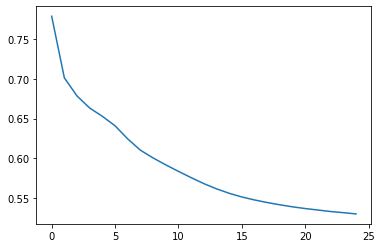

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],lable='val_loss')
plt.legend()